## OD Data 
### Comparison among modals

This notebooks contains graphs and others comparisons using the OD17 (Origin Destination survey) database.

We use these analyses to understand mobility patterns such as the differences between the motorcycle and car trips, or what characteristics cyclists have that seem to influentiate the choice for bicycle. 


In [20]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import warnings
import requests
import time
import numpy as np
from shapely.geometry import Point, LineString
warnings.simplefilter('ignore')

In [9]:
# Load Data

od_trips = pd.read_csv('bases/complete_csv.csv')
# fix FE_VIA with wrong format (because of thousand separator)
od_trips.loc[od_trips['FE_VIA'] >= 10000, 'FE_VIA'] = od_trips.loc[od_trips['FE_VIA'] >= 10000, 'FE_VIA'] / 1000
od_trips.dropna(inplace = True)
od_trips = gpd.GeoDataFrame(od_trips, crs={'init': 'epsg:4326'},
                 geometry=[LineString(eval(r)) for r in od_trips['route']])


In [10]:

od_bike_trips = gpd.read_file('../data/sao-paulo/od/routes/bike_routes_all.shp')
od_bike_trips.crs = {'init': 'epsg:4326'}

od_bike_trips['length'] = od_bike_trips['geometry'].length * 100000
od_trips['length'] = od_trips['geometry'].length * 100000

##   Bicycle Trips Stats

In [11]:
for c in od_bike_trips.columns:
    print(c)

id
ZONA
MUNI_DOM
CO_DOM_X
CO_DOM_Y
ID_DOM
F_DOM
FE_DOM
DOM
CD_ENTRE
DATA
TIPO_DOM
AGUA
RUA_PAVI
NO_MORAD
TOT_FAM
ID_FAM
F_FAM
FE_FAM
FAMILIA
NO_MORAF
CONDMORA
QT_BANHO
QT_EMPRE
QT_AUTO
QT_MICRO
QT_LAVALOU
QT_GEL1
QT_GEL2
QT_FREEZ
QT_MLAVA
QT_DVD
QT_MICROON
QT_MOTO
QT_SECAROU
QT_BICICLE
NAO_DCL_IT
CRITERIOBR
PONTO_BR
ANO_AUTO1
ANO_AUTO2
ANO_AUTO3
RENDA_FA
CD_RENFA
ID_PESS
F_PESS
FE_PESS
PESSOA
SIT_FAM
IDADE
SEXO
ESTUDA
GRAU_INS
CD_ATIVI
CO_REN_I
VL_REN_I
ZONA_ESC
MUNIESC
CO_ESC_X
CO_ESC_Y
TIPO_ESC
ZONATRA1
MUNITRA1
CO_TR1_X
CO_TR1_Y
TRAB1_RE
TRABEXT1
OCUP1
SETOR1
VINC1
ZONATRA2
MUNITRA2
CO_TR2_X
CO_TR2_Y
TRAB2_RE
TRABEXT2
OCUP2
SETOR2
VINC2
N_VIAG
FE_VIA
DIASEMANA
TOT_VIAG
ZONA_O
MUNI_O
NOME_O
CO_O_X
CO_O_Y
ZONA_D
MUNI_D
NOME_D
CO_D_X
CO_D_Y
ZONA_T1
MUNI_T1
CO_T1_X
CO_T1_Y
ZONA_T2
MUNI_T2
CO_T2_X
CO_T2_Y
ZONA_T3
MUNI_T3
CO_T3_X
CO_T3_Y
MOTIVO_O
MOTIVO_D
SERVIR_O
SERVIR_D
MODO1
MODO2
MODO3
MODO4
HORA_SAIDA
ANDA_O
HORA_CHEG
ANDA_D
DURACAO
MODOPRIN
TIPVG
PAG_VIAG
TP_ESAUTO
VL_EST
PE_BICI
V

In [17]:
total_bike_trips = sum(od_bike_trips['FE_VIA'])
print('Bike Trips: ', total_bike_trips)

Bike Trips:  383299.36855100014


## Comparing genders (for bicycles)

In [19]:
male_bike_trips = sum(od_bike_trips.loc[od_bike_trips['SEXO'] == 1]['FE_VIA'])
female_bike_trips = sum(od_bike_trips.loc[od_bike_trips['SEXO'] == 2]['FE_VIA'])
print('Bike Trips (M): ', str(round(male_bike_trips, 2)), round(male_bike_trips / total_bike_trips, 4))
print('Bike Trips (F): ', str(round(female_bike_trips, 2)), round(female_bike_trips / total_bike_trips, 4))

Bike Trips (M):  344859.56 0.8997
Bike Trips (F):  38439.81 0.1003


In [25]:
avg_dist = sum(od_bike_trips['length'] * od_bike_trips['FE_VIA']) / total_bike_trips

male_dist = sum(od_bike_trips.loc[od_bike_trips['SEXO'] == 1]['length'] * od_bike_trips.loc[od_bike_trips['SEXO'] == 1]['FE_VIA']) / male_bike_trips
female_dist = sum(od_bike_trips.loc[od_bike_trips['SEXO'] == 2]['length'] * od_bike_trips.loc[od_bike_trips['SEXO'] == 2]['FE_VIA']) / female_bike_trips

print(np.mean(od_bike_trips['length']))

print('Avg distance (M): ', str(round(male_dist, 2)))
print('Avg distance (F): ', str(round(female_dist, 2)))
print('Avg distance (all): ', str(round(avg_dist, 2)))

4056.2655584597487
Avg distance (M):  4405.9
Avg distance (F):  3368.52
Avg distance (all):  4301.87


## Comparing trips of different modals

In [44]:
od_car = od_trips.loc[od_trips['modal'] == 'car'].groupby('ID_PESS').max()
od_motorcycle = od_trips.loc[od_trips['modal'] == 'motorcycle'].groupby('ID_PESS').max()

In [49]:
od_people = od_trips.groupby('ID_PESS').max()
od_cyclists = od_bike_trips.groupby('ID_PESS').max()

#od_people_FE_PESS = []
#for i, r in od_people.iterrows():
#    for w in range(round(r['FE_PESS'])):
#        od_people_FE_PESS.append(r)
        
#od_people_FE_PESS = pd.DataFrame(data = od_people_FE_PESS, columns = od_people.columns)

#od_ciclistas_FE_PESS = []
#for i, r in od_people.iterrows():
#    for w in range(round(r['FE_PESS'])):
#        od_ciclistas_FE_PESS.append(r)
        
#od_people_FE_PESS = pd.DataFrame(data = od_people_FE_PESS, columns = od_people.columns)

In [50]:
print('Number of cyclists: ' + str(sum(od_cyclists['FE_PESS'])))
print('Number of people: ' + str(sum(od_people['FE_PESS'])))

Number of cyclists: 107593.21076500001
Number of people: 16530766.939525107


In [77]:
def compare_moto_car(column, bins = 10, density = False):
    od_col_car = od_car.groupby(column).sum('FE_PESS')
    od_col_moto = od_motorcycle.groupby(column).sum('FE_PESS')
    
    od_col_car['aux'] = od_col_car.index
    od_col_moto['aux'] = od_col_moto.index
    
    plt.figure(figsize=(15,4))
    ax_distance = plt.axes()
    ax_distance.set_axisbelow(True)
    plt.grid(linestyle='--')
    ax_distance.xaxis.grid(False)
    plt.hist(bins = bins, x=od_col_moto['aux'], weights = od_col_moto['FE_PESS'], density = density)
    plt.title(column + ' (motorcycle)')
    plt.xlabel(column)
    plt.ylabel('# people')
    plt.show()

    plt.figure(figsize=(15,4))
    ax_distance = plt.axes()
    ax_distance.set_axisbelow(True)
    plt.grid(linestyle='--')
    ax_distance.xaxis.grid(False)
    plt.hist(bins = bins, x=od_col_car['aux'], weights = od_col_car['FE_PESS'], density = density)
    plt.title(column + ' (car)')
    plt.xlabel(column)
    plt.ylabel('# people')
    plt.show()

    display()

def compare_bike_general(column, bins = 10, density = False):
    od_col_cyclists = od_cyclists.groupby(column).sum('FE_PESS')
    od_col_general = od_people.groupby(column).sum('FE_PESS')
    
    od_col_cyclists['aux'] = od_col_cyclists.index
    od_col_general['aux'] = od_col_general.index
    
    plt.figure(figsize=(15,4))
    ax_distance = plt.axes()
    ax_distance.set_axisbelow(True)
    plt.grid(linestyle='--')
    ax_distance.xaxis.grid(False)
    plt.hist(bins = bins, x=od_col_general['aux'], weights = od_col_general['FE_PESS'], density = density)
    plt.title(column + ' (all modals)')
    plt.xlabel(column)
    plt.ylabel('# people')
    plt.show()

    plt.figure(figsize=(15,4))
    ax_distance = plt.axes()
    ax_distance.set_axisbelow(True)
    plt.grid(linestyle='--')
    ax_distance.xaxis.grid(False)
    plt.hist(bins = bins, x=od_col_cyclists['aux'], weights = od_col_cyclists['FE_PESS'], density = density)
    plt.title(column + ' (cyclists)')
    plt.xlabel(column)
    plt.ylabel('# people')
    plt.show()

    display()
    
def print_values(df, column, step): 
    total = sum(df['FE_VIA'])
    print(total)
    max_value = max(df[column])
    x = 0 #dado para contar
    while x <= max_value + step:
        cyclists = sum(df.loc[df[column] >= x]
                       .loc[df[column]< x+step]['FE_VIA'])
        #print(str(age) + ' - ' + str(age + 5) + ':  \t' + str(cyclists))
        print('(' + str(x + step/2) + ', ' + str(cyclists / total) + ')')
        x += step

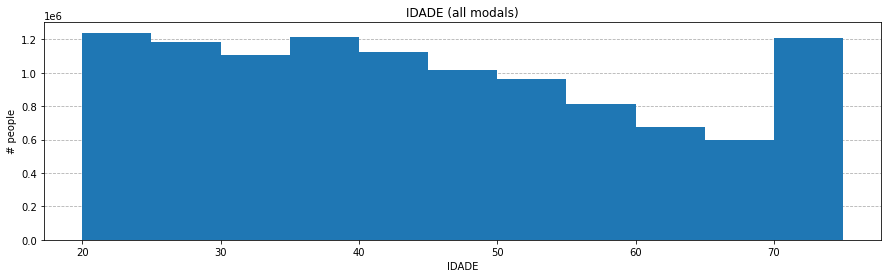

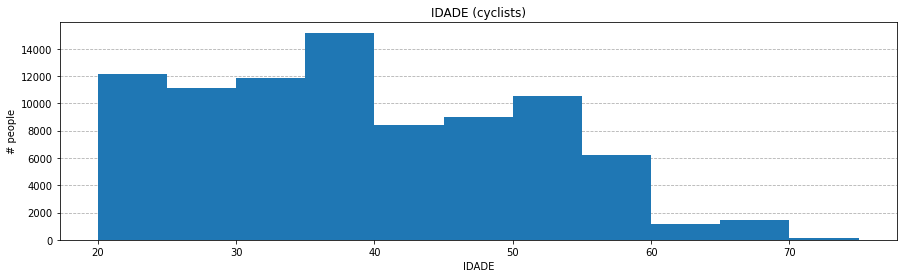

In [64]:
#age 
compare_bike_general('IDADE', bins = range(20,80,5), density = False)

#print_values(od_cyclists, 'IDADE', 5)
#print_values(od_people, 'IDADE', 5)

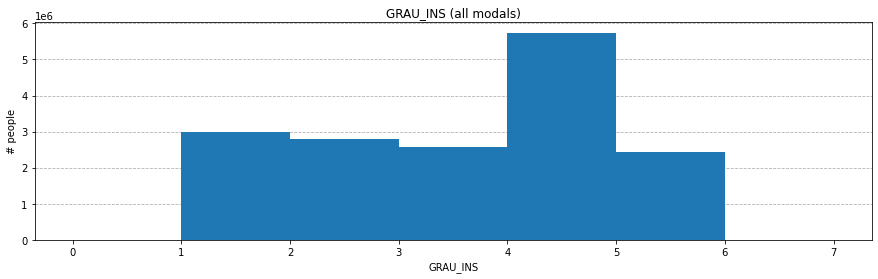

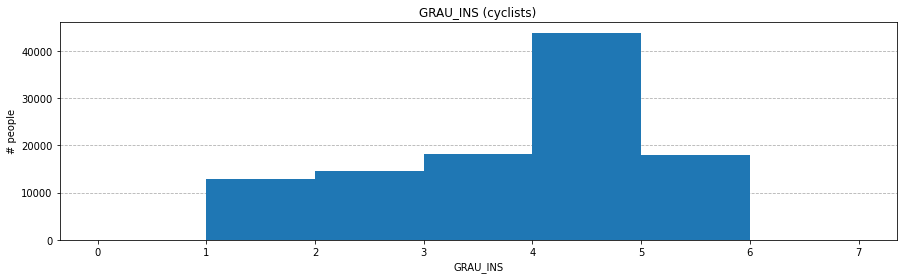

In [67]:
# education 
compare_bike_general('GRAU_INS', bins = range(8))

#print_values(od_ciclistas, 'GRAU_INS', 1)
#print_values(od_people, 'GRAU_INS', 1)

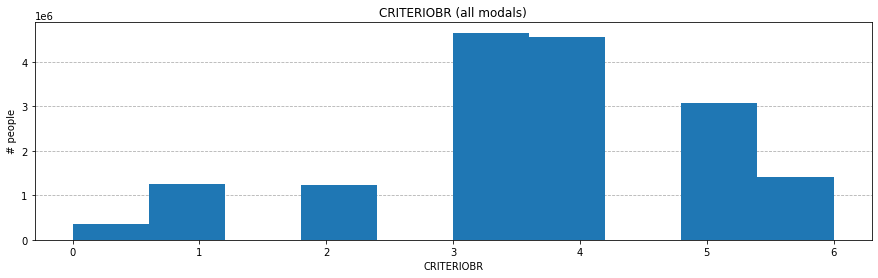

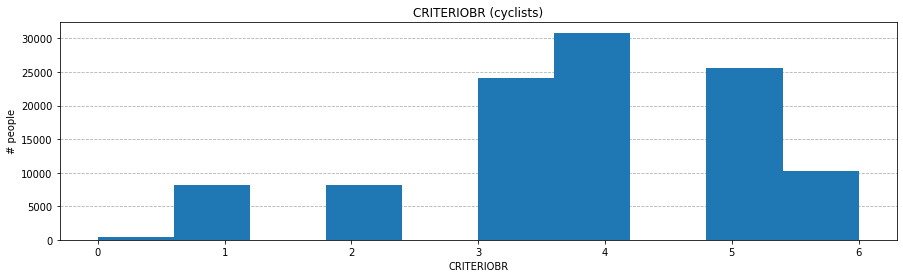

In [68]:
# life style
compare_bike_general('CRITERIOBR')

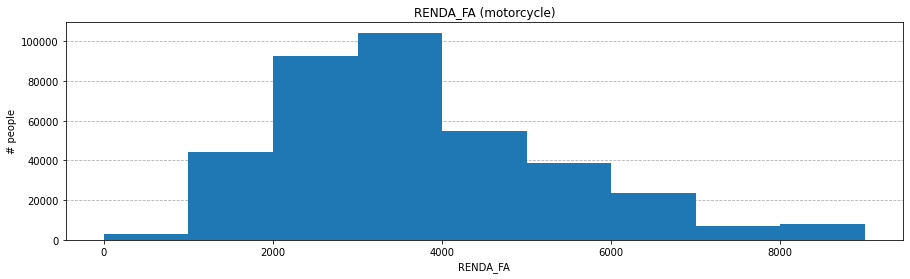

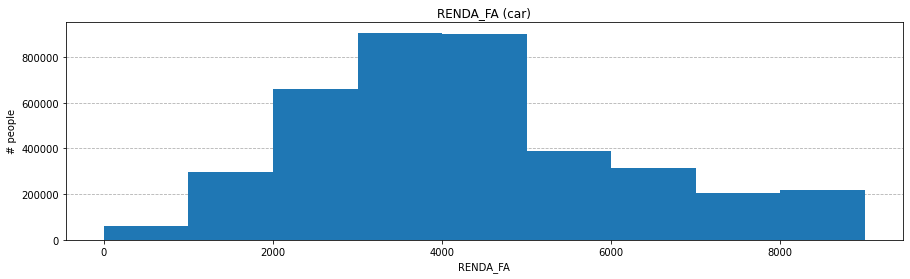

car drivers mean:  6323.487072920572
motorcyclists mean: 4144.494882262665


In [85]:
# familiar income (R$)
compare_moto_car('RENDA_FA', bins = range(0,10000,1000))

car_people = od_car.groupby('ID_PESS').max()
car_mean = sum(car_people['RENDA_FA'] * car_people['FE_PESS'])/sum(car_people['FE_PESS'])

motorcycle_people = od_motorcycle.groupby('ID_PESS').max()
motorcycle_mean = sum(motorcycle_people['RENDA_FA'] * motorcycle_people['FE_PESS']) / sum(motorcycle_people['FE_PESS'])

print('car drivers mean:  ' + str(car_mean))
print('motorcyclists mean: ' + str(motorcycle_mean))
    
#print_values(od_car, 'RENDA_FA', 1000)
#print_values(od_motorcycle, 'RENDA_FA', 1000)

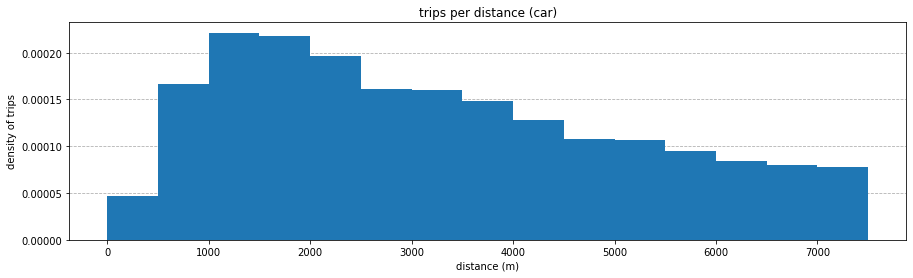

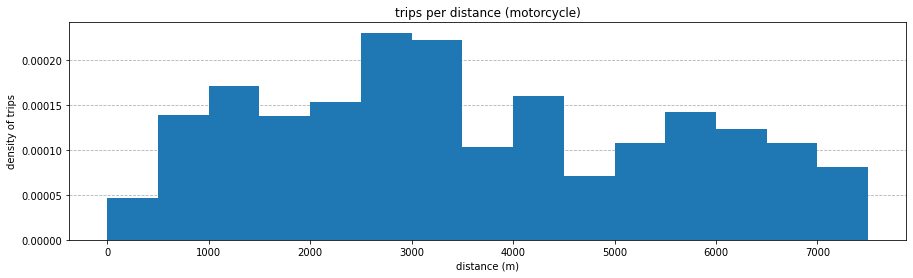

In [82]:
plt.figure(figsize=(15,4))
ax_distance = plt.axes()
ax_distance.set_axisbelow(True)
plt.grid(linestyle='--')
ax_distance.xaxis.grid(False)
plt.hist(bins=range(0,8000,500), x=od_car['length'], weights = od_car['FE_VIA'], density = True)
plt.title('trips per distance (car)')
plt.xlabel('distance (m)')
plt.ylabel('density of trips')
plt.show()

plt.figure(figsize=(15,4))
ax_distance = plt.axes()
ax_distance.set_axisbelow(True)
plt.grid(linestyle='--')
ax_distance.xaxis.grid(False)
plt.hist(bins=range(0,8000,500), x=od_motorcycle['length'], weights = od_motorcycle['FE_VIA'], density = True)
plt.title('trips per distance (motorcycle)')
plt.xlabel('distance (m)')
plt.ylabel('density of trips')
plt.show()

#print_values(od_bike_trips, 'length', 1000)
#print_values(od_trips, 'length', 1000)

In [86]:
car_mean = sum(od_car['length'] * od_car['FE_VIA'])/sum(od_car['FE_VIA'])
motorcycle_mean = sum(od_motorcycle['length'] * od_motorcycle['FE_VIA']) / sum(od_motorcycle['FE_VIA'])

print('car distance mean:  ' + str(car_mean))
print('motorcycle distance mean: ' + str(motorcycle_mean))

car distance mean:  8744.457871988263
motorcycle distance mean: 11589.767070602838
